In [3]:
# Import modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import os
import re
import seaborn as sns
from functools import reduce

sns.set()

In [2]:
# List the data
for path, _, filename in os.walk("../data"):
    print(filename)

['data_w_genres.csv', 'super_genres.json', 'data_by_artist.csv', 'data_by_genres.csv', 'data_by_year.csv', 'data.csv']


In [74]:
# Load data and peek into it

data = pd.read_csv("../data/data.csv", parse_dates=['year'], index_col='year')
data['artists'] = data.artists.apply(lambda x: literal_eval(x))
data.head(3)

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence
year,,,,,,,,,,,,,,,,,,,
1921-01-01,0,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630
1921-01-01,1,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594
1921-01-01,2,0.996,[John McCormack],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060


In [75]:
# Select import columns

columns = [ 'release_date', 'Unnamed: 0', 'id', 'key', 'mode']
data.drop(columns = columns, inplace=True)

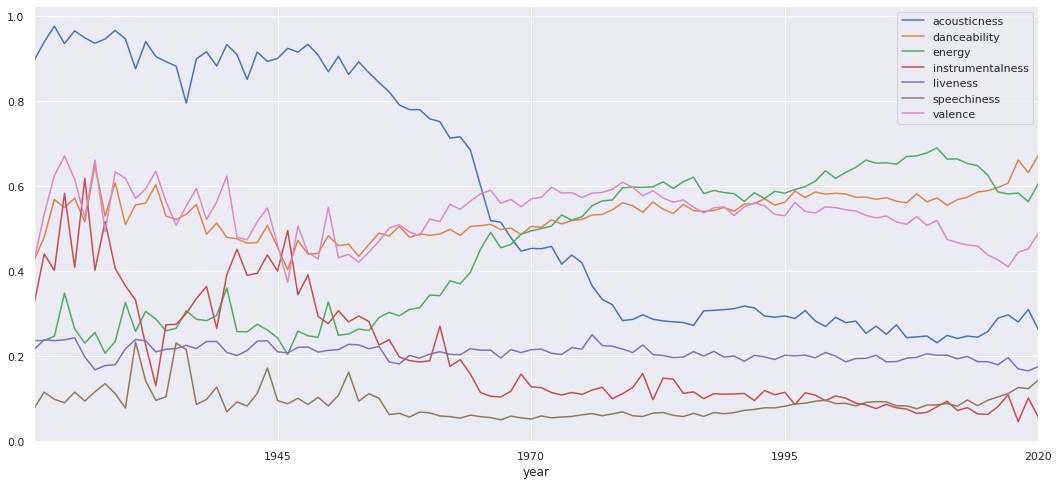

In [5]:
# How trends change over time?

cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
data[cols].resample('A').mean().plot(figsize=(18,8))
plt.show()

# Acousticness have been decreased and energy have been increased over time.

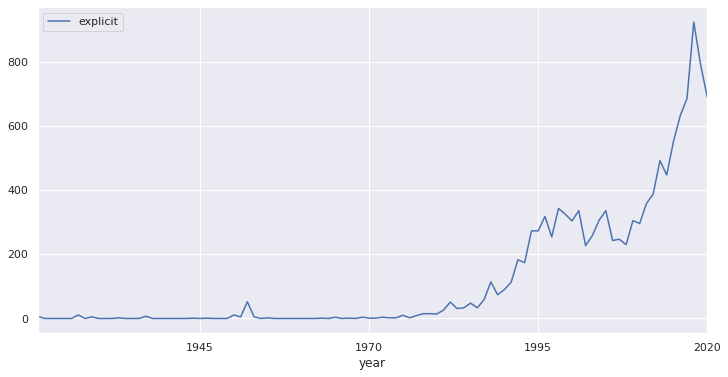

In [6]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAtgAAAF5CAYAAACle13TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+j8jraAAAgAElEQVR4nOzdeZhcZZ33/8+pql6r933vTmftkI2kCRA2BTUIIaDyAKK4ouP4OIPjTwceZwa4dB5HFp3BUUbHZdRHBxxwQaISUFEIEUhC9j3pPV29VS9VXd1d6/n90ekmTXrvqq6qzvt1XbkS+pw659vdJ/Qnd33v+zZM0zQFAAAAICws0S4AAAAAWEgI2AAAAEAYEbABAACAMCJgAwAAAGFEwAYAAADCiIANAAAAhBEBGwAAAAgjW7QLmExPj0ehEMt0I3pyc9PkdPZHuwxgQjyjiHU8o4hlFouh7Gx72K8b0wE7FDIJ2Ig6nkHEOp5RxDqeUVxoaBEBAAAAwoiADQAAAIQRARsAAAAIo5juwX6rYDCgnp5OBQK+aJcSd2y2RGVn58tqjatvOQAAQNyJq7TV09Op5ORU2e1FMgwj2uXEDdM05fG41NPTqby84miXAwAAsKDFVYtIIOCT3Z5BuJ4hwzBkt2cw8g8AADAP4ipgSyJczxJfNwAAgPkRdwF7Ibv11ptUV3dKkvTVr35Z+/fvnfT8X/3qaf3sZz+VJJ08eVx/+MMLEa8RAAAAk4urHuwLyX33/dOU59xyy62jfz558oR27nxZ1133zkiWBQAAgCkQsOfo8OFD+va3/10ej0eSdPfdn9KJE8d04sRxfeUrj2hoaEif/OSH9dd//Te6/PIrdeutN+m6696lXbtek8fTr9tue7/e977bz7vuZz7zSb3//XfpiiuuUn9/v77xja/p2LEjMgyL1q5dp8997l59//vf0eDgoO666yP63ve+rYEBjz7ykTu1bt3F+uxnvzDfXwoAAAAozgP2Kwcd2nHAEZFrX7mmWFesnnzFDbfbrUcf/YoeeeQbysvLU1dXlz7xiQ/pRz96Qg888EU9/fSTOnHiuC67bJMuv/zK0df19HTrBz/4ibq7nfroRz+gtWvXa8mSpRPe5xvf+JpSUlL0wx8+IYvFot7e3jHHMzOzdPfdn9LOnS/rn//54bl94gAAAJiTuA7Y0Xbo0H45HK36/Of/dvRjhmGotfWM7r//y/rIR+5UYWGRHn/8e2Net2XLzZKknJxcbdp0pfbu3TNpwN6582V973s/kcUy3DKflZUVgc8GAAAgfv30hRPasCxfKyqzo11KfAfsK1ZPPcocSaYpLV68VN/61nfPO3b48CFZLBb197vl83lls8X1lxoAACBm+QNB/WFPi7y+YEwEbFYRmYNVq9aopaVJb7yxe/RjR48elsvl0pe+9I968MGv6Lrr3qWHHvrnMa/73e+2SZJ6enr0l7+8ovXraye9z6ZNV+mJJ34s0zQl6bwWEUmy2+3q7++f66cEAAAQd1wevyTJ0e2JciXDGFadg4yMDH31q1/Xt771mB577GsKBPwqKSmVzZagG2/cqrVr12nVqtW6556/1q9+9fToqh+ZmVn62Mc+KI+nX3fd9REtXrxk0vv8zd98Tt/4xtd01123y2q16uKL1583iXHDho164omf6MMffv+4xwEAABYq18DwZnqOrgGZphn1/T8Mc2RYNAY5nf0Khd4sr62tUUVFlVGsaO5uvfUmPfzwv6q6evJQHQkL4es33/Lz09XZ6Y52GcCEeEYR63hGMR/2nerSN54+IEn6189cocy0pGm9zmIxlJubFvZ6aBEBAABAXHN7fKN/bnUORLGSYbSIzLOnn3422iUAAAAsKCMtIpLkcHpUE+WJjgRsAAAAxLU+j09JiVYZGu7Djra4C9ix0Lgej2K41R4AAGBO3AN+ZdoTZU+2qdUZ/ZVE4qoH22ZLlMfjIizOkGma8nhcstkSo10KAABA2Lk8PmWkJqo41y5HDATsuBrBzs7OV09Pp/r7z18HGpOz2RKVnZ0f7TIAAADCzuXxqTAnVcW5qdp5qE0DQwGlJkcv5sZVwLZabcrLi97OjQAAAIg9rgGflpZnqSTXLklq6x5QdUlG1OqJqxYRAAAA4FzBUEj9A35lpCaoOG84YEe7TYSADQAAgLjVP+CXKSnDnqj8rGRZLUbUJzoSsAEAABC3XAN+SVJGaqKsFosKc1KjvlQfARsAAABxy3V2F8cM+/BqacW5qbSIAAAAALN1fsC2q6N3UP5AKGo1EbABAAAQt0a2Sc9IHQ7YJbmpMk2pvSd6bSIEbAAAAMQtl8cnm9VQSpJV0vAItiQ5nARsAAAAYMZcHp8y7IkyDEOSVJSbKkPRXaqPgA0AAIC45Rrwj7aHSFJSglW5mcmMYAMAAACzMTKCfa6i3FQ5uhjBBgAAAGbMNeAbM4ItSSW5drV1DyhkmlGpiYANAACAuGSa5rgj2MW5qfIFQnL2DUWlLgI2AAAA4tKAN6BgyFRGasKYj7+5kkh02kQI2AAAAIhLb91kZkRJ3nDAbo3SlukEbAAAAMSliQJ2WkqC0lMTGMEGAAAAZsI14Jek8yY5SsNtIo5uRrABAACAaZtoBFsa3jLd0eWRGYWVRAjYAAAAiEt9Hp8MY7gl5K2Kcu3yDAXkPjvKPZ8I2AAAAIhL7gGf0lMSZLEY5x0ryU2VFJ2VRAjYAAAAiEvjrYE9YmSpvtYobJlOwAYAAEBcmixg52QkKSnBGpUt0wnYAAAAiEvjbZM+wjAMFeWm0iICAAAATJfL459wBFsa7sOmRQQAAACYBq8vKK8/OGnALs61q8ft1aA3MI+VEbABAAAQh1wDw2tgp6eev0TfiJGJjm3zvOHMtAL2iy++qFtuuUU333yztm7dqueff16SVF9fr9tvv12bN2/W7bffroaGhtHXTHYMAAAAmIuRTWYyJ2sRyYvOUn1TBmzTNPX3f//3evjhh/XMM8/o4Ycf1r333qtQKKQHHnhAd955p7Zv364777xT999//+jrJjsGAAAAzMVkuziOyM9KkdViyDHPfdjTGsG2WCxyu92SJLfbrYKCAvX09OjIkSPasmWLJGnLli06cuSIuru75XQ6JzwGAAAAzNVIi8hEq4hIks1qUUF2ilrneak+21QnGIahf/u3f9OnP/1ppaamyuPx6D//8z/lcDhUWFgoq9UqSbJarSooKJDD4ZBpmhMey8nJiexnBAAAgAVvZAQ7fZKALQ33YcdcwA4EAvrOd76jxx9/XBs2bNCePXv02c9+Vg8//HDEi8vNTYv4PYCp5OenR7sEYFI8o4h1PKOIBH9IsqckqKQ4c9LzFpdnad+pLmVl25Vgm5/1PaYM2EePHlVHR4c2bNggSdqwYYNSUlKUlJSk9vZ2BYNBWa1WBYNBdXR0qLi4WKZpTnhsJpzOfoVC5uw+MyAM8vPT1dnpjnYZwIR4RhHreEYRKe1Oj9JSEqZ8vrJSEhQKmTp8skOlefYxxywWIyIDulPG+KKiIrW1tamurk6SdPr0aTmdTlVWVqqmpkbbtm2TJG3btk01NTXKyclRbm7uhMcAAACAuXJ5fMqcZIm+ESVnQ/WZzv5IlzRqyhHs/Px8Pfjgg7rnnntkGIYk6Stf+YqysrL04IMP6r777tPjjz+ujIwMPfTQQ6Ovm+wYAAAAMBeuAd95I9LjKc23y2Y11NDm1saawnmobBoBW5K2bt2qrVu3nvfxxYsX66mnnhr3NZMdAwAAAObC5fFpRWX2lOfZrBaVF6SpweGah6qGsZMjAAAA4kogGJJnKKDMKVYQGVFVnKGGNrdC5vzM7SNgAwAAIK64B/ySJt9k5lxVReka8gXVPk9bphOwAQAAEFemuwb2iEXFGZKkBsf8rGhDwAYAAEBcGdnFMXOaI9jFualKTLCovm1++rAJ2AAAAIgrIyPYGfapl+mTJKvFoorCdEawAQAAgPHMtEVEkhYVZaip3a1gKBSpskYRsAEAABBXXAM+JdosSk60Tvs1VcXp8gVCcnRFfqIjARsAAABxxeXxKT01cXQTxOkYmehYPw/rYROwAQAAEFdcHt+0l+gbUZCdopQkqxraIt+HTcAGAABAXHEN+Ke9gsgIi2GosjCdEWwAAADgrYZbRKa3gsi5FhVnqLmjX/5AZCc6ErABAAAQN0KmKfeAf8YtItLwlunBkKkzXf0RqOxNBGwAAADEDc+gXyHTnFXAXlSULkmqj/B62ARsAAAAxI3RTWZmsAb2iNzMZKWlJKghwn3YBGwAAADEjTd3cZx5wDYMQ1VF6YxgAwAAACNcA35JswvY0nAfdmuXR15/MJxljUHABgAAQNx4s0Vk5quISMN92CHTVHNH5CY6ErABAAAQN1wDPlkMQ/aU2QXsqnnY0ZGADQAAgLjh8viUbk+QZQbbpJ8rOz1JmWmJaohgHzYBGwAAAHHD5fHNagWRcy0qylBDGyPYAAAAgFwDvllPcBxRVZyuNueAhnyRmehIwAYAAEDcCMcIdlVRhkxJrRHa0ZGADQAAgLhgmqZcA35l2Gc3wXFEVfHwjo7NHZ5wlHUeAjYAAADiwpAvKH8gNOcWkYzUROVmJKulkxFsAAAAXMDmsk36W1UVp6u5IzIriRCwAQAAEBdcA7PfJv2tFhVnqNvlnfN1xkPABgAAQFwI6wh2UfqcrzERAjYAAADiwmjADsMINgEbAAAAFzzXgF+SlJ46t1VEJCk1OUF5mclzvs54CNgAAACICy6PT/Zkm2zW8ETYsoLIjGITsAEAABAXXJ657+J4ruXlmWG71rkI2AAAAIh5IdNUU4dbeZkpYbvm+mX5YbvWuQjYAAAAiHnHm3rV2Tuky1YWhu2ahmGE7VrnImADAAAg5r28v1UpSTZtWB6ZUedwImADAAAgpnmG/Np9vFOXX1SoxARrtMuZEgEbAAAAMe3Vw+0KBEO6em1JtEuZFgI2AAAAYpZpmvrzvlZVFqWrojBym8OEEwEbAAAAMauhza2Wzv64Gb2WCNgAAACIYS/vb1WizaJLa8K3ekikEbABAAAQk7y+oF490q7aFQVKTbZFu5xpI2ADAAAgJu061qEhXzCu2kMkAjYAAABi1EsHWlWYk6qlZZHZ0jxSCNgAAACIOa1dHp1q6dPVa4sjtuNipBCwAQAAEHNePtAqq8XQplXF0S5lxgjYAAAAiCmBYEg7D7Vp3ZI8ZdoTo13OjBGwAQAAEFP2neySe8Cvq+JscuMIAjYAAABiyksHWpWdnqRVi3KiXcqsELABAAAQM5x9Qzpc162r1hTLYomvyY0jCNgAAACIGX853CZT0pWr429y4wgCNgAAAGLGofpuVRamKy8rJdqlzBoBGwAAADHB6wvq9Jk+1VRlR7uUOSFgAwAAICacaOlVMGRqJQEbAAAAmLujDT2yWQ0tLcuKdilzQsAGAABATDjS0K0lpZlKSrBGu5Q5IWADAAAg6twDPjV19KumMr7bQ6RpBmyv16sHHnhA73rXu3TTTTfpn/7pnyRJ9fX1uv3227V582bdfvvtamhoGH3NZMcAAACAcx1t7JEkrayKz81lzjWtgP3II48oKSlJ27dv17PPPqt77rlHkvTAAw/ozjvv1Pbt23XnnXfq/vvvH33NZMcAAACAcx1t7FFKklVVxenRLmXOpgzYHo9Hv/rVr3TPPffIMIZ308nLy5PT6dSRI0e0ZcsWSdKWLVt05MgRdXd3T3oMAAAAeKujDT1aXp4tqyX+O5htU53Q3NysrKwsffOb39Rrr70mu92ue+65R8nJySosLJTVOtyEbrVaVVBQIIfDIdM0JzyWkxP/w/4AAAAIn67eQXX0Duq62rJolxIWUwbsYDCo5uZmrVy5Uvfee6/279+vT33qU3rsscciXlxublrE7wFMJT8//t+qwsLGM4pYxzOKqeytG+5yuPLisgXxvEwZsIuLi2Wz2UbbPdauXavs7GwlJyervb1dwWBQVqtVwWBQHR0dKi4ulmmaEx6bCaezX6GQObvPDAiD/Px0dXa6o10GMCGeUcQ6nlFMx2sHW5WZlqhki+b1ebFYjIgM6E7Z5JKTk6NLL71Ur7zyiqTh1UGcTqeqqqpUU1Ojbdu2SZK2bdummpoa5eTkKDc3d8JjAAAAwIiQaepoY49WVmaPzveLd4ZpmlMOETc3N+uLX/yient7ZbPZ9NnPflbXXHONTp8+rfvuu08ul0sZGRl66KGHVF1dLUmTHpsuRrARbYy8INbxjCLW8YxiKs0d/XrgB6/rYzfU6Mo1M+t2mKtIjWBPK2BHCwEb0cYPBsQ6nlHEOp5RTOX515v05B9P6dFPb1JORvK83jtqLSIAAABApBxp7FFhTuq8h+tIImADAAAgKgLBkI439WrlAtge/VwEbAAAAERFXatLXn9QK6sI2AAAAMCcHW3skSFpeQUBGwAAAJizow3dqixKV1pKQrRLCSsCNgAAAObdkC+g060u1Syw9hCJgA0AAIAoONHcp2DI1MqqhbcRIQEbAAAA8+5IQ7dsVouWlmZGu5SwI2ADAABg3h1t7NHSskwlJlijXUrYEbABAAAwr1wen5o7+lWzwNa/HkHABgAAwLw62dInSVpBwAYAAADmrqHNJavFUGVhWrRLiQgCNgAAAOZVQ5tbpXl2JdgWXv+1RMAGAADAPDJNU41tblUWpUe7lIghYAMAAGDeOF1D6h/0q4qADQAAAMxdg8MtSaoqzohyJZFDwAYAAMC8aWx3y2oxVJZvj3YpEUPABgAAwLxpcLgW9ARHiYANAACAeWKaphra3KoqXrj91xIBGwAAAPPE2Tckz1BAlUULt/9aImADAABgnjS0nZ3guIBXEJEI2AAAAJgnDW0jExwX5g6OIwjYAAAAmBcNbS6V5tuVYFvYEXRhf3YAAACICSM7OFYt8P5riYANAACAedB1doLjQu+/lgjYAAAAmAcjExwrCdgAAADA3DW0uS6ICY4SARsAAADzoMHhVll+2oKf4CgRsAEAADAHPn9Q/kBw0nNM01RT+8LfwXEEARsAAACz9m9P7de//+LgpOd0ju7geGEEbFu0CwAAAEB88gdCOtnSp2DIVL3DpUXF4y/B1+BwSVr4OziOYAQbAAAAs3Kmq1/BkClJ+u2rjROe19jmls1qqDRv4U9wlAjYAAAAmKUGx/DSe5etLNQbxzvlcHrGP6/NrdILZIKjRMAGAADALDW0uWRPtumO65bKZrPoudeazjvnzR0cL4z2EImADQAAgFlqcLhVVZyhDHuirlpTrJ2H2tTj9o45p7N3UAPeC2MHxxEEbAAAAMyYPxDUmS7PaHDevLFCpik9v2vsKPbIDo5VReNPgFyICNgAAACYseYOj4IhczQ452elaOPKAv1pX6v6B/2j5zWMTHDMt0er1HlHwAYAAMCMNbSdv/TeDZdWyusL6sU3WkY/1tg2vIOjzXrhxM4L5zMFAABA2DQ43EpPTVBORtLox8oK0rRmca5e2N0irz8o0zTVcIFNcJQI2AAAAJiFhjaXqooyZBjGmI/fcFml+gf92nHAoY7eQQ16A6qaYAOahYqdHAEAADAjXv/wBMeLl+afd2xZeZaWlGXqudealJo0HDUrCxnBBgAAACbU3N4v05SqiscPzjdcWimna0jP7KiXzWq5oCY4SgRsAAAAzFD96ATH8Vs/1izJVWmeXR29gyovsF9QExwlAjYAAABmqMHhVmZaorLTk8Y9bjEMvfuyCklS5QW0/vUIerABAAAwI43tbi2aIjhvrCnUkYYebbqoaJ6qih0EbAAAAEzbkC8gR5dHl6womPQ8m9Wiu7esnKeqYgstIgAAAJi2pvZ+mdIFt7b1TBCwAQAAMG0NjvN3cMRYBGwAAABMW0ObW9npScpMG3+CIwjYAAAAmIH6C3Dr85kiYAMAAGBaBoYCau8euOC2Pp8pAjYAAACmpbHdLUlaxAj2pAjYAAAAmJbGtuGAXUnAnhQBGwAAANPS0OZSbkay0lMTo11KTCNgAwAAYFoaHG5VFTN6PZUZBexvfvObWr58uU6cOCFJ2rdvn7Zu3arNmzfrYx/7mJxO5+i5kx0DAABAfPEM+dXRO8gKItMw7YB9+PBh7du3T6WlpZKkUCikL3zhC7r//vu1fft21dbW6tFHH53yGAAAAOJPw9n+a1YQmdq0ArbP59OXvvQlPfjgg6MfO3TokJKSklRbWytJuuOOO/Tcc89NeQwAAADxhx0cp29aAfuxxx7T1q1bVVZWNvoxh8OhkpKS0f/OyclRKBRSb2/vpMcAAAAQfxra3CrISpE9OSHapcQ821Qn7N27V4cOHdLnP//5+ahnjNzctHm/J/BW+fn8Sx2xjWcUsY5ndGFo7vRoeVUO389pmDJg79q1S6dPn9Z1110nSWpra9PHP/5x3XXXXWptbR09r7u7WxaLRVlZWSouLp7w2Ew4nf0KhcwZvQYIp/z8dHV2uqNdBjAhnlHEOp7RhcE94FNH94DetrZkQX0/LRYjIgO6U7aIfPKTn9SOHTv0xz/+UX/84x9VVFSk73//+7r77rs1NDSk3bt3S5KefPJJXX/99ZKkVatWTXgMAAAA8WVkgxn6r6dnyhHsiVgsFj388MN64IEH5PV6VVpaqkceeWTKYwAAAIgvJ1v6JEkVhQTs6TBM04zZHgxaRBBtvLWJWMcziljHMxr/2roH9OB/va7l5dn6u9vWRrucsIpaiwgAAAAuTIFgSN999rASrBZ95N0rol1O3CBgAwAAYFzPvtKgeodbH75+hbLTk6JdTtwgYAMAAOA8p1r6tO0vDbpiVZFqVxREu5y4QsAGAADAGIPegL677bByM5J15zuXRbucuEPABgAAwBhP/OGkuvqGdPeWlUpJmvWicxcsAjYAAABG7TneoR0HHLrx8kotK5/ZJoEYRsAGAACAJKnH7dUPf3dMVUXp2nrFomiXE7cI2AAAAFDINPWD3x6VPxDSJ25aKZuVmDhbfOUAAACgvSc6dbi+W7dfu0TFufZolxPXCNgAAADQq4fblWlP1DXrSqNdStwjYAMAAFzgBr0BHahzqnZFgSwWI9rlxD0CNgAAwAVu36ku+QMhbaxhQ5lwIGADAIC4YJqmTrf2KRgKRbuUBWfX0Q5lpydpcWlmtEtZEAjYAAAgLhyu79b//fEePfb0AQ16A9EuZ8EYGPLrYJ1Tl6wokMWgPSQcCNgAACAuHG3skcUwdKS+R//ykz1y9g3N+ZqBYEimaYahuti610y8caJLwZCpjTWF0S5lwSBgAwCAuHCypU+LStL1d7etldM1pC//eLfqHa5ZX6/P49MX/mOnnnutKYxVjq9/0K//851X9fM/10X8XjP1+rF25WUma1FxerRLWTAI2AAAIOb5/EHVO1xaVpalixbl6It31SrRZtFDP31De453zOqaP33+uPr6fTra2BPmascyTVM/eu6YnK4hHap3RvReM9U/6NfRhh5dUlMgg/aQsCFgAwCAmFfvcCkYMrW0LEuSVJpn1z98qFblBWl6/JeH9LvXGmfUfrH7WId2H+9USpJNje3uiLZu7DzUpj3HO5WXmazmjn4N+WKnf3zP8Y7h9pAVtIeEEwEbAADEvBMtfZKkJWVvrnKRaU/UF95/sWpXFOipF0/rx9uPKxSaOii7B3z6yfPHVVmUrpuvqJJ7wK/efl9E6u7oHdRPXjihZeVZ+sA7l8k0pfrW2be1hNvrRztUmJ2iisK0aJeyoBCwAQBAzDvZ3KvSfLvSUhLGfDwxwaq/uvki3Xh5pf68r1Xf/83RKUP2E78/Kc9QQB+/oUZVxRmSpMZ2d9hrDoZC+t62I7IY0t1barT07D8OTp3pC/u9ZqPP49Oxph5dUlNIe0iYEbABAMC86+obVI/bO61zQyFTp870jbaHvJXFMPS+axbrPVdX6y+H2/T93xyZMGTvPdmpV4+0a8umKpUVpKm8IE2GpKa28Afs377apFMtffrgu5YrLzNFqckJKs2z69SZ2BjB3nO8Q6YpNpeJAFu0CwAAABeWQDCkh/97rzLTEvUPd9VOef5w33JQy8om3wTlpk1VMiT94qU6mZLuvnHlmG2/PUN+/Xj7cZXlp+nGyyslSSlJNhXkpIZ9BLve4dKvd9RrY02BLlv5Zn/z4tJM7T7WoZBpRn3N6dePdqgkz66yfNpDwo0RbAAAMK92He1QV9+QTp9xTWst6xMtvZKkZeXjj2Cfa8umKr336mq9erhd39t2ZMyuj0/+4aTcHr8+fmONbNY3I1BlYZqawhiwvb6g/vPZI8qwJ+quzcvHtF8sKc3UgDcgh3MgbPebjR63Vyebe7VxBaPXkUDABgAA8yZkmvrtq43KTk+SpGktsXeypU+5GUnKyUie1j22bKrS+66p1qtH2vW9bUcVDIV0sM6pVw626d2XVaiyaOx6z5WF6XK6vOof9M/8ExrH/7x4Sh3dA7p7y0rZk8f2jI9M0jwd5T7sXcc6ZEq6hPaQiCBgAwCAeXPgtFNnujy69ZrFqihI0+7jnZOeb5qmTjb3auk0Rq/PdePlwyH7tSPt+s6vj+hHzx1TcW6qtl6x6LxzK84G7nC0iew/1aUX957R5o0VqqnMPu94YXaK0lISdKolsgHb6w/KHwhNeHzX0XaVF6SpONce0TouVPRgAwCAefPbVxuVm5GsS2oK5HQN6Rcv1anbNTTh6HRn76D6PL4JJzhO5sbLq2QYhp7+02kZhvTFuzYowXb+2GJl4XDAbmp366KqnBnfZ4RpmvqfF0+pJM+u91xdPe45hmFoSWlmxFcS+Zf/t0dO15CuXluit68vVV5myuixrr5BnW516X3XjF8j5o4RbAAAMC9ONPfqVEufNm8sl81qUe3Z/t89JyYexT7RPBxEp5rgOJEbLqvUR29YoY9cv0KLS8a/RlpKgnIzktQ4x5VEDtd3y+Ec0A2XVYwb5EcsKctUW/eA3AMRWnu7Z0BNHf3KTEvSc6836d5v/0Xf/MVBHW3skWma2nVsuC3nkho2l4kURrABAMC8+O2rjUpLSdBVa0skSUU5qSrLt2vPsQ69s7Z83NecaOmVPdmm4rzZtzJctaZkynMqCtPV1N4/63tI0keHoGoAACAASURBVPO7m5VpT9TGKYLrktKzfditLq1bkjene47nUH23JOlv3rtaNqtFL+49o5f2t+qNE50qzbfL6wuqqihdBVkpU1wJs8UINgAAiLjmjn4dOO3UO2rLlJRgHf147fICnWzpU2//+Gtin2wZXv860kvaVRamq717YNbbmLd2eXSorlvXri8ds0LJeKqK0mW1GBGb6Hiorlv5WckqyE5Rbmaybn3bYj366U366LtXyGoY6uob0uUXFUXk3hhGwAYAABH3u9calZRg1bXry8Z8vHZFgUxJe8aZ7Njn8am9e0BLy2fXHjITFYXpMjX8D4HZ+P3uZtmsFl1zcemU5yYmWFVRmB6RiY7+QEhHG3u0qjp3zPKAiQlWXbW2RA989BJ95ZOX6boNZZNcBXNFwAYAABHV1Tuo14906Jp1JedtdV6SZ1dJnn3c5fpONp9d/3oWExxnamTpvtn0YfcP+rXzUJs2rSpURmritF6zpDRT9Q6XAsGJV/qYjVMtvfL6g1q9KHfc44ZhqCgndcwGPAg/AjYAAIio7a83yzCkd10yfp917fJ8HW/uVZ9n7KS/ky19SrRZzlu3OhKy0hKVnpowqz7sP+87I18gpHdM0Ec+niVlmfIFQrMeMZ/IwfpuWS2GVlRG/h8lmBgBGwAAREyv26uXDrTq8lVFEy7FV7uiQKYpvfGW1UROtPSquiRjyp7mcDAMQ5WF6TNeCzsQDOkPe1p0UVX2jLYcX1ySIUlhX67vUJ1Ty8qzlJzIOhbRRMAGAAARs21HnQKBkN59acWE55Tm2VWUk6rdx95sExn0BtTU7taSeWgPGVFRmK7WLs+kG7S81e7jHert9+mdE4zOTyQnI1m5GUlhnejY4/aqpdOjVdWzX8sb4UHABgAAETHoDWjbK/Vavyx/0h0DDcNQ7Yp8HW/qlevs2tB1rS6ZprRsHiY4jqgsSlcwZOpM1/TaNkzT1Au7mlWUk6pV1eP3PE9mcZg3nDlU75SkCfuvMX94/wAAAMxaa5dH//6LgwoEgucd8wdC8gz69e7LKqe8Tu3yAm3b2ai9Jzp1zbpSnWjulWFows1hIqGicLjFo6m9X1VFGVOef/qMS/UOt+5617JZLSO4pDRTrx/tmHQny5k4VNetrLREleaz/Xm0EbABAMCs7T/VpfbuAW1aVaTxMubSihxVl0wdVssL0lSQnaLdx4cD9smWXlUUpCslaf6iSn5WilKSrMMriayd+vzndzfLnmzTplXFs7rfkrO7U54606eNcwzYwVBIRxq6dfGy/DHL8yE6CNgAAGDW6hwu5Wcl6+4tK8c9np+frs7OqScOGoah2uUFeu61JvX1e1XX6tLV66begTGcLIah8oJ0NU1jomNX36D2HO/Q9ZdWKCnROuX54ynLT1NigmU4YM9x2/J6h1ueoYBWz6JVBeFHDzYAAJi1ulaXqsPUxlG7Il8h09SvdtTLFwjNy/rXb1VZmK7mjn6FQuak5/1xzxkZMnTd+tlv2GKzWlRdnBGWiY6H6pwyDGllVfacr4W5I2ADAIBZ6XF71eP2alHx1C0g01FZmK68zGS9tL9VkrS0fP4DdkVhmnyBkBzdAxOeM+QL6M/7W1W7In/OvdOLSzPV1N4vr//8HvaZOFjXrcUlmbInJ0x9MiKOgA0AAGal3uGSpGn1WE/H8Goiw2tiF2anKNM+vV0Rw2lkU5umSXZ0/P3uFg16A3rnDDaWmciS0kwFQ6Yazn4tZ8M94FODw6VVi1ieL1YQsAEAwKzUO1yyWgxVFEx/g5Wp1C4vkCQtjUJ7iCQV56YqwWaZcMOZlo5+/fqVetUuz9fi0rm3xoxcYy7L9R1u6JYpzWqpQEQGkxwBAMCs1LW6VFaQpsSE2U3yG8+i4nRdv7FCl9QUhO2aM2G1WFSWnzbuRMdAMKTv/eaIUpNs+uDm5WG5X1pKgopzU3X6zOxHsA/VdSstJUFV87ClPKaHEWwAADBjIdNUvcOl6jD1X48wDEO3XbskbH3ds1FZmKbG9n6Z5tiJjtt2NqipvV8fun6FMlLD174ysuHMuffzB0JqaHPppf2tev71pgl7tEOmqUP13bpoUY4sFpbnixWMYAMAgBlzOAc05AuGrf86llQUpetP+1rV2TekgqwUScPtMNt2NmrTqiKtX5Yf1vstKc3UjgMO/erlejldQ2pqd8vhHFDwnJVMdh5u02feu1p5mSljXtvc3i+Xx0f/dYwhYAMAgBmrbx1uaYjmSHOkVBa+OdGxICtF/kBQ39t2RJlpibrzHUvDfr/l5VkyJD27s0GZ9kRVFKZr7ZI8VRSmq6IwTQ7ngL777GF96Ye79elbVmlF5ZtL8Y1sj07Aji0EbAAAMGN1DpdSkqwqyk2NdilhV5Zvl8Uw1NjuVu2KAv3ypXo5nAP63O1rlRqBZfAKc1L15bsvlT3Zpsy0pPOPZ6fqHz9Uq2/+4qAefXKf3v+Opbp2fakMw9DBum5VFKaN+zpEDz3YAABgxupbXaoqypBlAW7LnWCzqiQvVU3t/TrR3KvtrzfpbReXatWiyK3SUZJnnzQkF+fa9Y8fqtWaxbn66Qsn9F+/OyaXx6fTZ/rYvTEGMYINAABmxOcPqqWzX9dfWhHtUiKmsjBd+0879f3fHFFeVrJue/viaJeklCSbPvO+1fr1jnr9+pUGHaxzKhgyaQ+JQYxgAwCAGWlq71cwZIZ9BZFYUlGYrv5Bv7p6h/TxG1cqOTE2xiQthqFbrqrW/37PKg15g0pJsoZlPW6EV2w8LQAAIG7UtQ5virJoAa4gMmJk8ua7NpZrWRS2bJ/KhuUFKi9I04A3IJuV8dJYQ8AGAAAzUudwKScjSVkLeGLd4tIMfe62tWNW7Ig1BdkLb4LpQkHABgAAM1LXGv4NZmKNYRhsPY5Z4z0FAAAwba4Bn7r6hhZ0ewgwVwRsAAAwbSMbzCz0EWxgLqYM2D09PfrEJz6hzZs366abbtJnPvMZdXd3S5L27dunrVu3avPmzfrYxz4mp9M5+rrJjgEAgPhU73DJMKTKovRolwLErCkDtmEYuvvuu7V9+3Y9++yzKi8v16OPPqpQKKQvfOELuv/++7V9+3bV1tbq0UcflaRJjwEAgPhV1+pSaV5azCxbB8SiKQN2VlaWLr300tH/XrdunVpbW3Xo0CElJSWptrZWknTHHXfoueeek6RJjwEAgPhkmqbqHS5VlzB6DUxmRj3YoVBITzzxhK699lo5HA6VlJSMHsvJyVEoFFJvb++kxwAAQHzq6BmUZyig6hI2NgEmM6P3d7785S8rNTVVH/zgB/XCCy9EqqZRublpEb8HMJX8fEZqENt4RjFfDjcND5StX1k0o+eOZxQXmmkH7IceekiNjY369re/LYvFouLiYrW2to4e7+7ulsViUVZW1qTHZsLp7FcoZM7oNUA45eenq7PTHe0ygAnxjGI+7TveoaQEq1KtxrSfO55RxDKLxYjIgO60WkS+/vWv69ChQ/rWt76lxMRESdKqVas0NDSk3bt3S5KefPJJXX/99VMeAwAA8ane4VJlUbosFiPapQAxbcoR7JMnT+o73/mOqqqqdMcdd0iSysrK9K1vfUsPP/ywHnjgAXm9XpWWluqRRx6RJFkslgmPAQCA+OMPhNTU7tY7asujXQoQ8wzTNGO2B4MWEUQbb20i1vGMYr7UO1z68o9269O3rFLtioJpv45nFLEsUi0iLGIJAAAkSf/+8wNy9g3p2g1lunRloZISrKPH6kZ2cGSLdGBKBGwAAKAet1d7T3YpNcmmH/7umJ568ZSuXluit68vVV5miupaXcq0Jyo7PSnapQIxj4ANAAB04HSXJOm+D6yXZ8ivP+xp0fbXm/Xc601atyRPDW1uVZdkyDCY4AhMhYANAAC072SXcjOSVZpvl2EYWl6RrW7XkF7ce0Z/3teq/kG/rttQFu0ygbhAwAYA4ALn9Qd1pLFHV68tGTNCnZORrPdds1hbr6jS0cYeLS/PjmKVQPwgYAMAcIE72tAjfyCkdUvyxj2eYLNqzeLxjwE437Q2mgEAAAvXvlNdSk60annFzHZcBjA+AjYAABewkGlq/+kurVqUI5uVWACEA3+TAAC4gDW2udXX79PaCdpDAMwcARsAgAvY/lNdMgxpzeLcaJcCLBgEbAAALmD7TnVpcWmm0lMTo10KsGAQsAEAuEB1u4bU1N4/4eohAGaHgA0AwAVq/2mnJNF/DYQZARsAgAvU/lNdys9KVkluarRLARYUAjYAABcgry+oIw09Wrckf8zujQDmjoANAMAF6HBDtwLBkNYtYfUQINwI2AAAXID2nepSSpJNS8vZvREINwI2AAAXmJBp6sBpp1ZXs3sjEAn8rQIA4AJT73DJ5WH3RiBSCNgAAFxg9p/qksUwtLqa/msgEgjYAABcYPaddGpJWabSUhKiXQqwIBGwAQC4gHT1Daqlk90bgUgiYAMAEMN+8NujevGNlrBdb9/JLknSWpbnAyKGgA0AQIxq6ejXjgMO/c+fTss14Jvz9Rrb3PrFS3WqKkpXca49DBUCGA8BGwCAGPXyAYesFkM+f1C/2dk4p2u19wzoX/9nn1KTbfrMe1eHqUIA4yFgAwAQgwLBkP5yuE0XL83TFauL9eLeFjn7hmZ1rd5+r7725D6FTOn/u32dcjKSw1wtgHMRsAEAiEH7Tnapf9CvK9eU6OYrFkmSnnmlfsbXGRjy6+s/2y/3gF+f/V9raQ0B5gEBGwCAGLTjoEPZ6UlatShHuZnJevvFZXrloEMOp2fa1/D5g3rs6QNyOD36zHtXq7okI4IVAxhBwAYAIMb0uL06WOfUFauLZLEYkqQbN1UqMcGqX748vVHsYCikbz9zWKda+vSJm1bqokU5kSwZwDkI2AAAxJidhxwyTemK1cWjH8tITdTmS8q1+1iHGtvck77eNE398LfHtO9Ulz74rmXaWFMY6ZIBnIOADQBADDFNUy8fcGh5eZYKs1PHHNu8sUL2ZJt+/ufTE75+YCigx391SK8catPNVy7S29eXRbpkAG9BwAYAIIacaO5VR8+grlxTfN6xlCSbbry8Sofqu3W8qee8441tbn3ph7u090SXbnv7Em29omoeKgbwVgRsAABiyI4DDiUnWlW7vGDc49euL1V2epKe/vNpmaYpaXjU+0/7zuj//r898gdDuvcDF+v6SytkGMZ8lg7gLAI2AAAxYtAb0K7jHdpYU6ikROu45yQmWHXTFVU6fcal/aecGvIF9L1tR/Tj545reUWWHvjoJVpaljXPlQM4ly3aBQAAgGG7jnXI5w/pqnHaQ8515epiPfdak5760ylJUlv3gN5z1SLduKlKFkatgahjBBsAgBjx8oFWleTZp1yv2ma16D1XVcvhHJBn0K/P375ON12xiHANxAhGsAEAiAGtXR6dPuPSbW9fMq3e6UtqCmTK1IqKbGWlJc1DhQCmi4ANAEAM2HHQIavF0OWriqZ1vsUwdNnK6Z0LYH7RIgIAQJQFgiHtPOjQmsW5yrQnRrscAHNEwAYAIMoOnnbKNeDXVWtKol0KgDAgYAMAEEVef1DP7KhXpj1RqxfnRLscAGFAwAYAIEpM09QPf3dMzR39+vD1K2S18GMZWAj4mwwsQIfqnfo///mq+vq90S4FiGmNbW798qU6+QPBqNz/udeb9NqRdr3n6mqtW5oXlRoAhB8BG1iAntlRr/buAf3hjZZolwLErK7eQf3r/+zTszsb9G9PHdCQLzDna7b3DOhHzx1TXatrynMP1jn19J9Oq3ZFgW68vHLO9wYQOwjYwAJz6kyfTp9xKSXJphffOCOvLzojc0AsG/QG9NjPD8gfNPXeq6t1vKlXX/vZPg0M+Wd1PdM09fKBVj34g136875W/ctP9mjbzgaFQua457d3D+jbzxxWaV6aPn5DzbTWvQYQPwjYwALz/OtNSk2y6VM3XyTPUEA7DzmiXRIQU4KhkL79zGE5ugb06fes0pZNVfrrW1apweHWw/+9V64B34yu1z/o1388c1j/9dtjqipK15c+tlEblufrFy/V6eH/fkNdfYNjzh/0BvSNnx+Q1WLob9+3WkmJ1nB+egBiAAEbWEA6ewe150Sn3nZxqVYtytGi4nQ9v6tZIXP8UTTgQvSzP57SwTqnPvCuZbqoanjVjg3L83XPrWvU1j2gh376hnrc05u/cLSxRw/84HXtPdGpW9+2WF94/8UqK0jTX229SHdvqVFTR78e+MEuvXakXZIUMk1999kjau8e1KdvWaW8rJSIfZ4AooeADSwgL+xqlsUwdN2GMhmGoc0bK9TeM6j9J7uiXRoQE17ce0a/392id9aW6+0Xl445tqo6V5+7fZ163F79y0/2qKN3cIKrDG8M89SfTunRJ/YqMcGqf/jQBt1wWaUsluFWD8MwtGlVsR782EaV5KXqO78+rO8+e0RP/+m09p3q0vvfsVQrKrMj+rkCiB62SgcWCM+QXy8fcGhjTaGy05MkDY/K5WYkafvrTbp4WX6UKwSi63BDt376/AmtWZyr269dMu45y8qz9IX3X6yv/2yfvvqTPbrzHcvk9QfV5/Gpr9+nPo9XLo9P7T2D6nF7dc26Et1x7dIJ2zwKslJ03wfW69lXGvTszgaZpnTVmmJdu7503PMBLAwEbGCBeGlfq7z+oDZvLB/9mNVi0Ttqy/WzP55SvcOlRcUZUawQiB6H06PHf3lIJXmp+qutF42ONI9nUXGG7v3Aej365D49/qtDox9PSrAqMy1RmfZELS7J0OWrinTx0qn/4Wq1WHTLVdVatShXB+q6dNOmRUxqBBY4AjawAASCIf1+T4tqKrNVUZg+5tjVa0v061fqtf31Jn3q5lVRqhCInjOd/fr3nx9UgtXQ3966RilJU//oK8tP0z/ffalauzyjoTo5cW4/MpeUZWpJWeacrgEgPhCwgQVg19EO9bi9+vD1K847lpJk09VrS/TCrhY53zak3MzkKFQIzD/XgE/PvFyvP+07o9Qkmz77v9YqL3P6kwrTUhK0rDwrghUCWKgI2ECcM01T219vUkmeXaurc8Y95x0byvXCrha9sLtZd1y3dJ4rBOZXIBjSH/a06NevNMjrC+ra9WW6+cpFSktJiHZpAC4QBGwgzh1r6lVTR78+8u4VE/Z15mYm65KaAr20v1U3X7loWm+RA9ESMk31D/g10eKSVouh5ESrbNaxC2GZpql9J7v0sxdPqaNnUGsW5+q2ty9RSZ498kUDwDn4KQvEue2vNykjNUGXX1Q46XmbN5brtSPteml/qzZvrJin6oDp6R/063B9tw7WOXWovlsuz9SbvdishpISrEpOtCop0SbTNOVwDqg4N1V/d9tara7OnYfKAeB8BOwZGvQG9PyuZjW1u3XthjKtrMxmNjgipt7h0u9ebZTFYmh1da5WVecq0544ery1y6MDp5265cpFSrBNvhtcVVGGlpdn6fe7m/WO2jJZLSyDj7kb8gW092SXEm0WrVmcpwTb9J4r0zTV0ObWwdNOHaxzqs7hkmlK9mSbVlXnanFJhqwTrPQRCJoa8gfl9Q3/GvIFNOQPyucP6dr1ZXrbxSU83wCiKqIBu76+Xvfdd596e3uVlZWlhx56SFVVVdN+fSAYkiVGwqvPH9Qf3zij377aqP5Bv9JSErT3ZJdWVGTpvVcvvmBnhve4vdp3slOJCVatW5onezI9juFwprNfv3y5Xm+c6FRaSoIsFkOvH+2QJFUWpWt1da7WVOfq5QOtSrBZ9LZprqm7eWOFvvHzA9p9rFOXrpx8xBuYiGmaOtnSpx0HHNp1rENef1DS8KTAy1YW6so1xeetZiMNt37Utbq0+1iHdh/vULfLK0NSVXGGbtpUpdWLc7WoKGPSJfQAIB4Yphm5PZQ/9KEP6X3ve59uvvlmPfPMM/r5z3+uH//4x9N+/f9++A8qzbOrdkWBVi3KmXKELhICwZBe3t+qX+9sUF+/T6sW5eg9V1erLD9Nf953Rtt2Nsg14Neaxbl679XV5/1Q6eob1MmWPp1s7tXpVpfSUhK0tCxTS8uztLgkY87LPkVDj9ur3cc6tOt4h0639I32SVothlZW5ah2Rb7WL8tfEGE7Pz9dnZ3uebtfR8+AntlRr1cPtys5yarNGyv0ztpyJSVa1dzerwN1w6N9p8/0aeRv7tvWlehD46weMp6QaeofvvuahrwBbVier6VlWVpWnjW6MQ0mN+gNqLmjX03tbrkGfCrJs6uiIF1FOalhD4VeX1DNncP36nZ5lZuZrMLsFBVkpygnPXn0ftN5RkMhU93uIbX3DKqjZ1BdfYNKTrAqMy1JmfbEs8vQJSk9NeG8vuZzdbuGtPNQm3YcdKijZ1BJiVZdsqJAV64ultcf1I4DDu092alA0FRFQZquWFOsS1cWqr17QLuOdWjP8U71uL2yWQ2tWpSrDcvztXpxrjJSEye8J+LffP9/FJgJi8VQbm5a2K8bsYDtdDq1efNmvfbaa7JarQoGg7r00kv1/PPPKydn/JUO3uo/nt6nP+89I89QQMmJwyOk65bkKXWeJmg5XUP6zV8a1dU3pKVlmXrv1dVaXjF2a1uvL6jf72nW715t0oA3oEtWFGh5RZZOtfTpREuvul1eSVJKklXVJZlyD/jU3NEv05QshqGKwjQtK8/S4tJMpUywE9hkRnYY6+33yeXxnt1pbPiXzWoo0540uobr8A/SJGWkJspmnXkYaHUOaPexDp060ydJKs2365LlBdqwokBeX1C7jrVr97FOOV1DsloM1VRlq3Z5gXJiILyFzOF3IYZ8QXn9w28pe8/+dzBkDvdxJliVlDj8a+TPWZmpau9yv/lWtP/N30cmWg33gNpGe0ETEywzfufFlLT3RKdePuCQ1TK81fm7L6uccNUDz5BfRxp6dPpMnzZvrJhRQD7Z0qtf76jXqTOu0ZHHvMzks2E7UylJtjefo37v6PPkGvApJdE2JpCNPFvpqQkx827TeEwN/2P53O/h6J8n+V5aLIYcTo8a24eDbkfPm1tnG2evK0mJCRaV56epvDBdFYVpyrInyXv22kPewNjnxjCGn7HEsfeyWgw5ugfU1O5WU3u/2rsHRq9vMQyFzvlftc1qKD8rRYXZqSrMs2toyH/+52zq7I6DA+rsHVQg+ObrrRZDwdD5/+s3JKUm2yZse/MMDk88XF6epSvXFKt2ecF5Oxj2D/r12pF27TjgUGP7m6FqJFRfsqJAa5fkKTU5/gYXMDsEbMSyuAvYhw4d0r333qvf/OY3ox+74YYb9Mgjj+iiiy6a9nX8gZAOnOrUK/tb9ZeDDvUPnv+DJJKqSzN117trtGFFwaS91v2Dfv3yT6f065dOa8gXVE5GklYuytXKRbm6qDpXlcVv9hMODPl1rKFHh+udOlzn1ImmHvkDoTnVaRhSZlqSctKTlZWRpKy0JAWDpnrcQ8O/XN6wfO2qijN0xdoSXbGmROXjvAVsmqZONvdqx/5WvbL/zJhAEmsshpScZJPVYpHXH5TvbNicSqLNoqREm0KhkAa9AY2TU2bFZjW0+bIq3faOZcrJiPxa1cFgSHWtfTpS363DdU4dqXeqr//NiWVWi6Hs9CRlZyQrOz1ZmWmJGvAG1Ov2qts1pF73kAa90/uaxarpfi+LclNVXZqp6pLM4d9LM5VhT1JLh1t1Z/qGf7X2qf5MnzxDganv5QsqNMHNCrJTzt4jS9UlGaouzVJuZrK6XUNydHnU2tV/9nePHF0e9fV7J/z8MtOSVJxnV0me/ezvaSrOsysnI1nBUEg9bu/o97PH7VWva0h9Hp8m+rGQlZ6st60vU/E0V+Wob+3TzgMOlebbtfGiIqUugHe1AGA6YjpgO539Y34IBYIhNXf0jzvyEgkJVovKC9NmNDLXP+jXoDegvMzkaU9+9AdCau3yyB+cechOsFqUlZaotNSEKSf1+APDo90uj3/MaNh0ZaQmqCA7ddrnm6apM10eDfmiH8IMDW9zfO4IdYLNMuZ7FAqZY0a4h3xBZWenatDjHR1pTEq0jPk6m6apQDA0/LpzRkdn84TmZiRHtVXDNE119AzKHwwpKy1Jqcm2KZ/9IV9AfR7fpEuqxYqRUeqZfC/9gZAKs1OnPdpqmqY6+4bkGfSfMyJuVWLC2CXlJrpXQXbKjFurGB1ErOMZRSyL1Ah2xN6jKy4uVnt7u4LB4GiLSEdHh4qLi2d9TZvVokXFGWGsMvzSUhJmvJlBgs2iyqLzR4PDLcFmVV5myox2MpsLwzBUlh/+hzZSLBZDqcm2s2FqOOhO9YPBMAwl2KxKsFmVPv1/e8QkwzBUmDOzTyI50abkRJsKs6c+N9aF43tpGIYKslKkrMn/ji2k5wYAcL6IrWOUm5urmpoabdu2TZK0bds21dTUTLv/GgAAAIhHEV1F5PTp07rvvvvkcrmUkZGhhx56SNXV1dN+/VtbRID5xlubiHU8o4h1PKOIZXHXIiJJixcv1lNPPRXJWwAAAAAxha2uAAAAgDAiYAMAAABhRMAGAAAAwoiADQAAAIQRARsAAAAIIwI2AAAAEEYEbAAAACCMCNgAAABAGEV0o5m5sliMaJcA8Bwi5vGMItbxjCJWRerZjOhW6QAAAMCFhhYRAAAAIIwI2AAAAEAYEbABAACAMCJgAwD+/3buP6aq+o/j+BMuA0dKgA695Eprw1HWrJE0wFw366LjcrVWOudtpUvXpv2YtuHVJRFO0IVryuaczn9yujWKiaQ5xyh0s2DaitikzJR2lQQ1RCO89376w3H25YuCP24Xuvf1+O/8eB8+7+3N2Ytzz0VEREJIAVtEREREJIQUsEVEREREQkgBW0REREQkhBSwRURERERCSAFbRERERCSEFLAlapSXl+NwOJgyZQqtra3W/vr6eubNm4fL5WLRokW0tbUNqN26deuAuilTpuByuXC73bjdoKo4BgAACK5JREFUbk6ePBmWPiRy3emM/v7779b8ud1uHA4H06dPt+pOnz7N/PnzcTqdzJ8/n99++y3cLUmEuZv76GDHHA4H+fn51gw3NDSEtR+JPJcuXeLNN9/E6XTicrlYvnw5Fy9eBOD777+nsLAQp9PJ4sWL6ezsBG7cKz0eD/n5+RQUFLB69Wp6enqsa9bV1ZGfn88LL7zAu+++y19//TX0QoxIlGhsbDQ+n88899xz5uTJk8YYYy5fvmymT59ufv31V2OMMdXV1Wbx4sX96pqbm82SJUv61RljTEZGhunu7g5fAxLx7nZG+5SWlpoPP/zQ2vZ4PKa6utqq83g8/3IHEunudEaHmt//v6+K3KtLly6ZY8eOWdtlZWVm9erVJhAImFmzZpnGxkZjjDGVlZWmqKjIGGNMW1ub+emnn4wxxgQCAfPOO++YrVu3GmOM6e7uNjk5Oeb06dPGGGO8Xq/ZsmXLkOvQE2yJGllZWdjt9n77zpw5w7hx45g8eTIAM2fO5MiRI9Zfu729vZSUlFBcXBzu5UoUupsZ7dPb20tNTQ0vv/wyAJ2dnbS0tFBQUABAQUEBLS0tA+pE7sSdzujtzq9IqCQnJ5OdnW1tT5s2DZ/PR3NzMwkJCWRlZQGwYMECDh48CMDEiRN59NFHAYiNjeWJJ57A5/MB8M033zB16lQmTZpk1R04cGDIdShgS1SbPHkyHR0d/PDDDwDU1NQAcO7cOQA++eQTCgsLmThx4k3rPR4Pbrebjz/+mN7e3vAsWqLKUDPap66ujvHjx/PYY49Zx8ePH4/NZgPAZrORlpY2oE7kXg02o7czv6tWrcLlclFcXExXV1eYVy+RLBgMsmfPHhwOB+fOnSM9Pd06lpqaSjAY5PLly/1qenp6qKqqwuFwAAyoS09Pv637qAK2RLUxY8awefNmNmzYwEsvvURnZydJSUnYbDZOnDhBc3MzCxcuvGltfX09n3/+Obt37+aXX36hsrIyzKuXaDDYjP6vqqoq6+m1SDgNNqNDze/u3bvZt28fVVVVGGMoKSkZ5m4kknz00UckJiayaNGi2zrf7/fz3nvv8cwzz/D888/f08+Ou6dqkQiQk5NDTk4OAB0dHezcuZMHH3yQTz/9lFOnTlm/ZOfPn2fJkiVs2LCBvLw862PS0aNH88orr7Br165h60Ei261mtE97ezuNjY1s3LjR2me322lvbycQCGCz2QgEAvzxxx8DPt4XCYXBZnSwY33zGB8fz8KFC3nrrbeGYfUSicrLyzlz5gzbtm0jNjYWu91uvfYBcPHiRWJjY0lOTgYgEAiwatUq7r//ftauXWudZ7fb+fbbb61tn893W/dRPcGWqHfhwgXgxkdJFRUVLFiwgMTERJYuXcqRI0eoq6ujrq6OCRMmsHPnTvLy8vjzzz+tbxj7/X6++uorMjMzh7MNiWC3mtE+X3zxBTNnziQlJcXaN3bsWDIzM9m/fz8A+/fvJzMzk9TU1PAuXqLCYDN6q2PXrl3jypUrABhj+PLLL3UflZCoqKigubmZyspK4uPjAZg6dSo9PT00NTUBsHfvXvLz84Ebs1lUVITNZmP9+vXExMRY15oxYwY//vij9V+Y9u7dy+zZs4dcQ4wxxoS4L5ERqbS0lEOHDtHR0UFKSgrJycnU1tayZs0ajh8/zvXr18nNzcXr9ZKQkDCg3uFwsG3bNjIyMjhx4gQffPABMTEx+P1+nnzySbxeL/fdd98wdCaR4m5n1Ol0smbNGp599tl+1zt16hRFRUV0dXWRlJREeXk5Dz/8cLjbkghyNzN6q2NtbW2sWLGCQCBAMBjkkUceYe3ataSlpQ1zl/Jf9vPPP1NQUMCkSZMYNWoUcONLjJWVlRw/fpx169bx999/88ADD7Bp0ybGjRtHfX09y5YtIyMjg9jYG8+en3rqKdatWwfA4cOH2bRpE8FgkMzMTMrKyvo95LgZBWwRERERkRDSKyIiIiIiIiGkgC0iIiIiEkIK2CIiIiIiIaSALSIiIiISQgrYIiIiIiIhpIAtIiIiIhJCCtgiIiIiIiGkgC0iEqX8fv9wL0FEJCIpYIuIjEA7duxgxYoV/faVlpZSWlrKlStX8Hq95OXlMWPGDDZv3kwgEADg7NmzvPbaa2RnZ5Odnc3KlSvp6uqyruFwONi+fTsul4tp06YpZIuI/AsUsEVERqDCwkIaGhqscOz3+6mtrWXu3LkUFRURFxfHoUOHqK6u5ujRo3z22WcAGGNYtmwZDQ0NHDhwgPPnz7Nly5Z+166trWX79u00NTURFxcX9t5ERCKdAraIyAiUlpZGVlYWBw8eBKChoYGUlBQmTJjA119/jdfrJTExkbFjx/L6669TW1sLwEMPPURubi7x8fGkpqbyxhtv0NjY2O/aHo8Hu93OqFGjwt6XiEg00KMLEZERat68eezZs4dXX32Vffv24Xa78fl8+P1+8vLyrPOCwSB2ux2Ajo4O1q9fT1NTE1evXsUYQ1JSUr/r9p0rIiL/DgVsEZERatasWRQXF9Pa2kp9fT3vv/8+cXFxxMfHc+zYsZu+3lFRUUFMTAw1NTUkJydz+PBhSkpK+p0TExMTrhZERKKSXhERERmhEhIScDqdrFy5kscff5z09HTS0tLIzc2lrKyM7u5ugsEgZ8+e5bvvvgPg6tWrJCYmMmbMGNrb29mxY8cwdyEiEn0UsEVERrC5c+fS2tqK2+229m3cuJHr168zZ84cnn76ad5++20uXLgAwPLly2lpaSErK4ulS5fy4osvDtfSRUSiVowxxgz3IkRE5OZ8Ph+zZ8/m6NGjjB49eriXIyIit0FPsEVERqhgMMiuXbuYM2eOwrWIyH+IvuQoIjICXbt2jdzcXNLT0/UetYjIf4xeERERERERCSG9IiIiIiIiEkIK2CIiIiIiIaSALSIiIiISQgrYIiIiIiIhpIAtIiIiIhJCCtgiIiIiIiH0D3t1mx/0Ro/aAAAAAElFTkSuQmCC# Number of explicit music per year

cols = ['explicit']
data[cols].resample('A').sum().plot(figsize=(12,6))
plt.show()

# Explicit music have been increased.

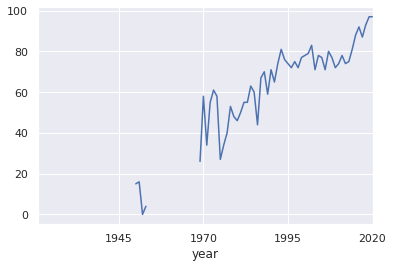

In [15]:
# Popularity of explicit music over time

explicit_music = data[data.explicit == 1]
explicit_music.resample('A').first().popularity.plot()

In [79]:
# Top 5 popular songs of Eminem

def check_artist(x, artist='Eminem'):
    for i in x:
        if i == artist:
            return True
    return False

    
data[data.artists.apply(check_artist)].nlargest(5, 'popularity')


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence
year,,,,,,,,,,,,,,
2020-01-01,0.14500,"[Eminem, Juice WRLD]",0.808,210800,0.745,1,0.0,0.2920,-5.260,Godzilla (feat. Juice WRLD),91,0.3420,165.995,0.829
2002-01-01,0.06220,"[Eminem, Nate Dogg]",0.548,297787,0.847,1,0.0,0.0816,-3.237,'Till I Collapse,83,0.1860,171.447,0.100
2002-01-01,0.00286,[Eminem],0.908,290320,0.669,1,0.0,0.2370,-2.827,Without Me,82,0.0738,112.238,0.662
2010-01-01,0.24100,"[Eminem, Rihanna]",0.749,263373,0.925,1,0.0,0.5200,-5.034,Love The Way You Lie,81,0.2270,86.989,0.641
2000-01-01,0.03020,[Eminem],0.949,284200,0.661,1,0.0,0.0454,-4.244,The Real Slim Shady,79,0.0572,104.504,0.760


In [7]:
# # Check if a numerical or special character is present in artist name.

# mask = data_by_artist.artists.str.match(r'([^A-za_z])')
# data_by_artist[mask].head()
# # Replace with Fake Name

# data_by_artist.loc[mask, 'artists'] = 'Unkown'

In [48]:
# Load data and peek into it

data_w_genres = pd.read_csv("../data/data_w_genres.csv")
columns = ['Unnamed: 0', 'key', 'mode']
data_w_genres.drop(columns = columns, inplace=True)
data_w_genres.head(3)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,genres
0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2267,"['tango', 'vintage tango']"
1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1068,"['classical', 'early romantic era', 'polish cl..."
2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,965,"['classical', 'classical era', 'early romantic..."


In [49]:
# Top 5 positive music artists (No vocal)

no_vocal  = data_w_genres[data_w_genres.instrumentalness > 0.5]
no_vocal.nlargest(5, 'valence')

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,genres
19505,John Doherty,0.988000,0.746,137093.0,0.386,0.946,0.205,-12.720,0.0874,119.318,0.999,21.0,1,"['irish fiddle', 'jig and reel']"
19354,Tizz3lbeatz,0.382000,0.643,45740.0,0.565,0.860,0.108,-9.610,0.0483,104.999,0.992,59.0,1,[]
15739,Soulsearcher,0.000362,0.747,412973.0,0.973,0.565,0.308,-6.415,0.0370,128.127,0.983,53.0,1,"['chicago house', 'deep house', 'disco house',..."
15464,Los Rurales De Gilberto Parra,0.499000,0.707,173933.0,0.779,0.897,0.314,-6.367,0.0479,127.707,0.979,22.0,1,[]
15725,Tony MacMahon,0.931000,0.578,198067.0,0.529,0.943,0.927,-10.605,0.0592,126.925,0.978,28.0,1,"['irish accordion', 'irish folk']"


In [50]:
# Most popular rapper

def check_for_genre(x, genre='rap'):
    for i in x:
        if genre in i:
            return True
    return False

data_w_genres['genres'] = data_w_genres.genres.apply(lambda x: literal_eval(x))
mask = data_w_genres['genres'].apply(check_for_genre)
rappers = data_w_genres[mask]
top_5 = rappers.nlargest(5, 'popularity')
top_5

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,genres
11028,Dímelo Flow,0.272667,0.787000,224591.333333,0.65700,0.000215,0.068200,-3.909333,0.168300,147.264667,0.565667,87.666667,3,"[latin, reggaeton, reggaeton flow, trap latino]"
18963,Giveon,0.629000,0.735000,220488.000000,0.44900,0.000000,0.113000,-7.507000,0.347000,122.947000,0.039700,86.000000,1,"[alternative r&b, indie r&b, trap soul]"
7666,JACKBOYS,0.071475,0.724500,208440.000000,0.61525,0.000004,0.206750,-5.131000,0.225300,131.098750,0.386000,80.250000,4,"[rap, trap]"
3126,Lenny Tavárez,0.245531,0.709846,264826.538462,0.69800,0.000017,0.160315,-4.262154,0.185354,168.879923,0.706846,80.230769,13,"[latin, trap argentino]"
17988,Tion Wayne,0.000415,0.572000,169355.000000,0.51900,0.000023,0.129000,-8.054000,0.243000,100.453000,0.704000,80.000000,1,"[london rap, uk hip hop]"


In [71]:
# Load data and peek into it

data_by_genres = pd.read_csv("../data/data_by_genres.csv")
columns = ['key', 'mode']
data_by_genres.drop(columns = columns, inplace=True)
data_by_genres.head(3)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.983000,0.21850,1.496130e+05,0.018350,0.874000,0.112800,-37.256000,0.038750,69.526500,0.062900,40.500000
1,432hz,0.485070,0.33000,1.059273e+06,0.463084,0.480393,0.118862,-17.099000,0.086288,125.227125,0.217675,52.125000
2,[],0.686395,0.51683,2.305397e+05,0.397491,0.202883,0.221324,-12.773475,0.109871,111.933224,0.513905,21.556669


In [72]:
# Most Popular Genres 

data_by_genres.nlargest(5, 'popularity')

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
2100,russian dance,0.005610,0.653000,198095.000000,0.945000,0.915000,0.439000,-2.6340,0.095900,126.091000,0.326000,85.000000
511,circuit,0.009030,0.745000,189818.000000,0.972000,0.465000,0.297000,-3.5060,0.077400,128.031000,0.556000,82.000000
1095,guaracha,0.009030,0.745000,189818.000000,0.972000,0.465000,0.297000,-3.5060,0.077400,128.031000,0.556000,82.000000
2017,r&b en espanol,0.274831,0.745015,218545.238462,0.641785,0.002416,0.117165,-4.8676,0.157413,134.531315,0.537846,78.446154
793,dong-yo,0.259000,0.829000,80927.000000,0.886000,0.000000,0.055900,-1.7460,0.112000,115.056000,0.777000,78.000000


In [114]:
# Import modules 

import pandas as pd
from ast import literal_eval
import os
import re
from functools import reduce
import json

# Load data
data = pd.read_csv("../data/data.csv", parse_dates=['year'], index_col='year')
data['artists'] = data.artists.apply(lambda x: literal_eval(x))
data.reset_index(inplace=True)


In [106]:
a = data[data.index.year == 2000].nlargest(5, 'popularity').reset_index(drop=True).to_json(orient='records')

In [120]:

def check_artist(x, artist):
    for i in x:
        if i == artist:
            return True
    return False

    
data[data.artists.apply(check_artist, artist='Eminem')].nlargest(5, 'popularity').reset_index(drop=True).to_json(orient='records')


'[{"year":1577836800000,"Unnamed: 0":9887,"acousticness":0.145,"artists":["Eminem","Juice WRLD"],"danceability":0.808,"duration_ms":210800,"energy":0.745,"explicit":1,"id":"7FIWs0pqAYbP91WWM0vlTQ","instrumentalness":0.0,"key":10,"liveness":0.292,"loudness":-5.26,"mode":0,"name":"Godzilla (feat. Juice WRLD)","popularity":91,"release_date":"2020-01-17","speechiness":0.342,"tempo":165.995,"valence":0.829},{"year":1009843200000,"Unnamed: 0":8072,"acousticness":0.0622,"artists":["Eminem","Nate Dogg"],"danceability":0.548,"duration_ms":297787,"energy":0.847,"explicit":1,"id":"4xkOaSrkexMciUUogZKVTS","instrumentalness":0.0,"key":1,"liveness":0.0816,"loudness":-3.237,"mode":1,"name":"\'Till I Collapse","popularity":83,"release_date":"2002-05-26","speechiness":0.186,"tempo":171.447,"valence":0.1},{"year":1009843200000,"Unnamed: 0":8073,"acousticness":0.00286,"artists":["Eminem"],"danceability":0.908,"duration_ms":290320,"energy":0.669,"explicit":1,"id":"7lQ8MOhq6IN2w8EYcFNSUk","instrumentalness

In [5]:
class Genre():
    def __init__(self):
        self.load_data()
        self.sort_by_popularity()

    def load_data(self, filename="../data/data_by_genres.csv"):
        self.data = pd.read_csv(filename)

    def sort_by_popularity(self):
        self.data.sort_values('popularity', ascending=False)
    
    def to_json(self, sorted_data):
        return json.loads(sorted_data.to_json(orient='records'))

    def popular_genres(self):
        return self.to_json(self.data)


In [8]:
import json
g = Genre()


In [9]:
g.popular_genres()

[{'genres': '21st century classical',
  'acousticness': 0.983,
  'danceability': 0.2185,
  'duration_ms': 149613.0,
  'energy': 0.01835,
  'instrumentalness': 0.874,
  'liveness': 0.1128,
  'loudness': -37.256,
  'speechiness': 0.03875,
  'tempo': 69.5265,
  'valence': 0.0629,
  'popularity': 40.5,
  'key': 1,
  'mode': 1},
 {'genres': '432hz',
  'acousticness': 0.48507,
  'danceability': 0.33,
  'duration_ms': 1059273.25,
  'energy': 0.46308375,
  'instrumentalness': 0.4803925,
  'liveness': 0.1188625,
  'loudness': -17.099,
  'speechiness': 0.0862875,
  'tempo': 125.227125,
  'valence': 0.217675,
  'popularity': 52.125,
  'key': 6,
  'mode': 1},
 {'genres': '[]',
  'acousticness': 0.6863952691,
  'danceability': 0.51683021,
  'duration_ms': 230539.7306291229,
  'energy': 0.3974906074,
  'instrumentalness': 0.2028825096,
  'liveness': 0.2213235015,
  'loudness': -12.7734753609,
  'speechiness': 0.1098713176,
  'tempo': 111.933224309,
  'valence': 0.5139053046,
  'popularity': 21.55666